# EEG Classification
### DATAFRAME DESCRIPTION:

We divided and shuffled every 4097 data points into 23 chunks, each chunk contains 178 data points for 1 second, and each data point is the value of the EEG recording at a different point in time. So now we have 23 x 500 = 11500 pieces of information(row), each information contains 178 data points for 1 second(column), the last column represents the label y {1,2,3,4,5}.



### LABEL DESCRIPTION:

* 5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open
* 4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed
* 3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area
* 2 - They recorder the EEG from the area where the tumor was located
* 1 - Recording of seizure activity

### EEG Classification
* eyes open vs eyes closed
* seizure non-seizure
* health brain area vs tumor brain area
* eyes open vs eyes closed vs seizure vs health brain area vs tumor brain area

In [1]:
# imports
import sys
import os
import numpy as np
import tensorflow as tf
import pandas as pd
import func.models as models
import func.utils as utils
from sklearn.model_selection import train_test_split

In [2]:
DATA_PATH = '../data/raw.csv'

In [3]:
df_raw = pd.read_csv(DATA_PATH, index_col=0)
df_raw

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
Unnamed,,,,,,,,,,,,,,,,,,,,,
X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
X15.V1.924,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,15,16,12,5,-1,-18,-37,-47,-48,2
X19.V1.354,-47,-11,28,77,141,211,246,240,193,136,...,-65,-33,-7,14,27,48,77,117,170,1
X8.V1.28,14,6,-13,-16,10,26,27,-9,4,14,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5


In [4]:
df_raw.shape

(11500, 179)

## Data preprocessing

In [5]:
# Get X_data and Y_data
Y = np.asarray(df_raw['y'])
Y_data = tf.keras.utils.to_categorical(Y)
X_raw = np.asarray(df_raw.iloc[:,:-1])

In [6]:
X_data = utils.normalize_data(X_raw)

In [7]:
# Split into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

In [8]:
input_shape=X_train.shape[1:]
input_shape

(178,)

### Multi Layer Perceptron

In [9]:
mlp = models.mlp_model(input_shape, True)
mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               53700     
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 20)                1020      
                                                                 
 dense_4 (Dense)             (None, 6)                 126       
                                                                 
Total params: 89,996
Trainable params: 89,996
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = mlp.fit(X_train, Y_train, validation_split=0.15, epochs=20)

Epoch 1/20
245/245 [==============================] - 1s 2ms/step - loss: 1.6348 - accuracy: 0.2028 - val_loss: 1.6091 - val_accuracy: 0.2101
Epoch 2/20
245/245 [==============================] - 0s 977us/step - loss: 1.6086 - accuracy: 0.2068 - val_loss: 1.5963 - val_accuracy: 0.2594
Epoch 3/20
245/245 [==============================] - 0s 1ms/step - loss: 1.4153 - accuracy: 0.3468 - val_loss: 1.3363 - val_accuracy: 0.3312
Epoch 4/20
245/245 [==============================] - 0s 1ms/step - loss: 1.2215 - accuracy: 0.4075 - val_loss: 1.1811 - val_accuracy: 0.4043
Epoch 5/20
245/245 [==============================] - 0s 964us/step - loss: 1.1890 - accuracy: 0.4161 - val_loss: 1.1809 - val_accuracy: 0.4058
Epoch 6/20
245/245 [==============================] - 0s 979us/step - loss: 1.1663 - accuracy: 0.4270 - val_loss: 1.1413 - val_accuracy: 0.4478
Epoch 7/20
245/245 [==============================] - 0s 996us/step - loss: 1.1594 - accuracy: 0.4308 - val_loss: 1.1692 - val_accuracy: 0.400

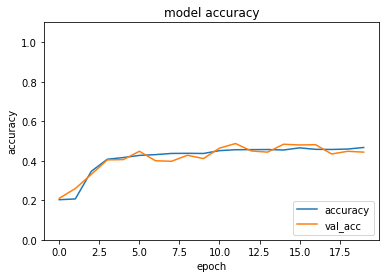

In [11]:
utils.get_train_plot(history)

In [12]:
utils.get_test_acc(mlp, X_test, Y_test)

72/72 [==============================] - 0s 535us/step
(2300,)
(2300,)
Training Accuracy: 0.45


### CNN

In [13]:
input_shape=X_train.shape[1],1
input_shape

(178, 1)

In [14]:
cnn = models.cnn_model(input_shape, True)
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 176, 32)           128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 88, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 86, 16)            1552      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 43, 16)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 41, 32)            1568      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 21, 32)          

In [15]:
history = cnn.fit(X_train, Y_train, validation_split=0.15, epochs=20)

Epoch 1/20
245/245 [==============================] - 1s 4ms/step - loss: 1.6262 - accuracy: 0.1986 - val_loss: 1.6229 - val_accuracy: 0.2036
Epoch 2/20
245/245 [==============================] - 1s 3ms/step - loss: 1.6136 - accuracy: 0.1981 - val_loss: 1.6163 - val_accuracy: 0.2036
Epoch 3/20
245/245 [==============================] - 1s 3ms/step - loss: 1.3884 - accuracy: 0.3376 - val_loss: 1.2035 - val_accuracy: 0.3833
Epoch 4/20
245/245 [==============================] - 1s 3ms/step - loss: 1.1389 - accuracy: 0.4630 - val_loss: 1.0792 - val_accuracy: 0.5051
Epoch 5/20
245/245 [==============================] - 1s 3ms/step - loss: 1.0923 - accuracy: 0.4914 - val_loss: 1.0856 - val_accuracy: 0.5130
Epoch 6/20
245/245 [==============================] - 1s 3ms/step - loss: 1.0602 - accuracy: 0.5228 - val_loss: 1.0270 - val_accuracy: 0.5304
Epoch 7/20
245/245 [==============================] - 1s 3ms/step - loss: 1.0171 - accuracy: 0.5467 - val_loss: 0.9726 - val_accuracy: 0.5884
Epoch 

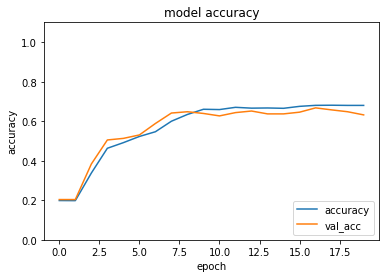

In [16]:
utils.get_train_plot(history)

In [17]:
utils.get_test_acc(cnn, X_test, Y_test)

72/72 [==============================] - 0s 1ms/step
(2300,)
(2300,)
Training Accuracy: 0.6617391304347826


### Bi-Directional LSTM

In [18]:
input_shape=X_train.shape[1],1
input_shape

(178, 1)

In [19]:
blstm = models.cnn_model(input_shape, True)
blstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 176, 32)           128       
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 88, 32)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 86, 16)            1552      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 43, 16)           0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 41, 32)            1568      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 21, 32)          

In [20]:
history = cnn.fit(X_train, Y_train, validation_split=0.15, epochs=20)

Epoch 1/20
245/245 [==============================] - 1s 3ms/step - loss: 0.6962 - accuracy: 0.6794 - val_loss: 0.7517 - val_accuracy: 0.6667
Epoch 2/20
245/245 [==============================] - 1s 3ms/step - loss: 0.6916 - accuracy: 0.6790 - val_loss: 0.7741 - val_accuracy: 0.6543
Epoch 3/20
245/245 [==============================] - 1s 3ms/step - loss: 0.6744 - accuracy: 0.6914 - val_loss: 0.7135 - val_accuracy: 0.6674
Epoch 4/20
245/245 [==============================] - 1s 3ms/step - loss: 0.6778 - accuracy: 0.6858 - val_loss: 0.7408 - val_accuracy: 0.6558
Epoch 5/20
245/245 [==============================] - 1s 3ms/step - loss: 0.6928 - accuracy: 0.6774 - val_loss: 0.7220 - val_accuracy: 0.6594
Epoch 6/20
245/245 [==============================] - 1s 3ms/step - loss: 0.6836 - accuracy: 0.6863 - val_loss: 0.7024 - val_accuracy: 0.6783
Epoch 7/20
245/245 [==============================] - 1s 3ms/step - loss: 0.6737 - accuracy: 0.6914 - val_loss: 0.7132 - val_accuracy: 0.6609
Epoch 

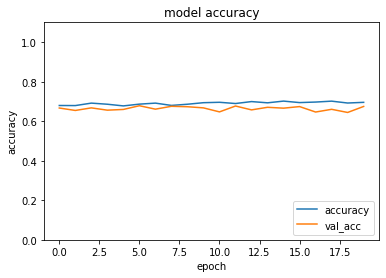

In [21]:
utils.get_train_plot(history)

In [22]:
utils.get_test_acc(blstm, X_test, Y_test)

72/72 [==============================] - 0s 1ms/step
(2300,)
(2300,)
Training Accuracy: 0.1782608695652174


### CNN + Bi-Directional LSTM

In [23]:
input_shape=X_train.shape[1],1
input_shape

(178, 1)

In [24]:
cnn_blstm = models.cnn_model(input_shape, True)
cnn_blstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 176, 32)           128       
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 88, 32)           0         
 1D)                                                             
                                                                 
 conv1d_9 (Conv1D)           (None, 86, 16)            1552      
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 43, 16)           0         
 1D)                                                             
                                                                 
 conv1d_10 (Conv1D)          (None, 41, 32)            1568      
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 21, 32)          

In [28]:
history = cnn.fit(X_train, Y_train, validation_split=0.15, epochs=20)

Epoch 1/20
245/245 [==============================] - 1s 4ms/step - loss: 0.6531 - accuracy: 0.7041 - val_loss: 0.7189 - val_accuracy: 0.6884
Epoch 2/20
245/245 [==============================] - 1s 4ms/step - loss: 0.6193 - accuracy: 0.7147 - val_loss: 0.7207 - val_accuracy: 0.6529
Epoch 3/20
245/245 [==============================] - 1s 4ms/step - loss: 0.6279 - accuracy: 0.7113 - val_loss: 0.7552 - val_accuracy: 0.6580
Epoch 4/20
245/245 [==============================] - 1s 4ms/step - loss: 0.6197 - accuracy: 0.7141 - val_loss: 0.7326 - val_accuracy: 0.6601
Epoch 5/20
245/245 [==============================] - 1s 4ms/step - loss: 0.6242 - accuracy: 0.7129 - val_loss: 0.7540 - val_accuracy: 0.6464
Epoch 6/20
245/245 [==============================] - 1s 4ms/step - loss: 0.6224 - accuracy: 0.7136 - val_loss: 0.7387 - val_accuracy: 0.6725
Epoch 7/20
245/245 [==============================] - 1s 4ms/step - loss: 0.6241 - accuracy: 0.7125 - val_loss: 0.7196 - val_accuracy: 0.6703
Epoch 

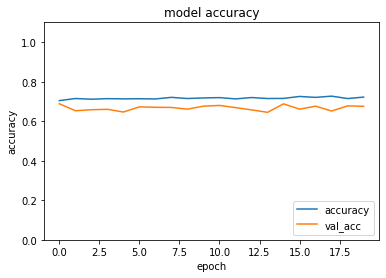

In [29]:
utils.get_train_plot(history)

In [30]:
utils.get_test_acc(cnn_blstm, X_test, Y_test)

72/72 [==============================] - 0s 1ms/step
(2300,)
(2300,)
Training Accuracy: 0.19304347826086957
